# Clustering Customers of a Comic Book Store

In this exercise I use clustering in order to segment customers by Recency, Frequency, and Monetary Value in order to improve quantitative marketing strategies and to develop commercial strategies. The Recency, Frequency, and Monetary Value features for a given customer interaction are analysed in the context of the total cost of service of the interaction.
 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.decomposition import PCA

%matplotlib inline

In [3]:
# Read the data
data=pd.read_csv("RFM_Assignment_Week11.csv")
data.describe()

,Recency,Frequency,MV,CoS
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,30.116293,17.164128,8806.972152,8805.228492
std,17.742131,29.419952,3391.111080,3285.384316
min,-4.942628,-1.237633,760.115629,944.136187
25%,18.221827,3.710640,8065.394231,9957.361435
50%,28.588186,6.030687,10462.416975,10000.463454
75%,35.880252,9.999136,10608.634596,10041.297949
max,67.258701,102.189321,11139.504803,11054.536104


In [4]:
# Normalize (Standard) and apply to the data
scaler=StandardScaler()
data=scaler.fit_transform(data)

For n_clusters = 3 The average silhouette_score is : 0.7441
For n_clusters = 4 The average silhouette_score is : 0.7899
For n_clusters = 5 The average silhouette_score is : 0.7249
For n_clusters = 6 The average silhouette_score is : 0.6557
For n_clusters = 7 The average silhouette_score is : 0.6513
For n_clusters = 8 The average silhouette_score is : 0.6143


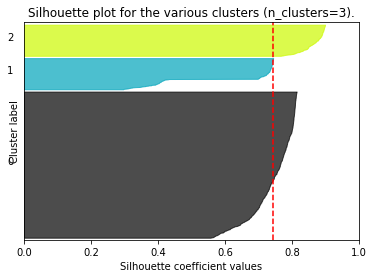

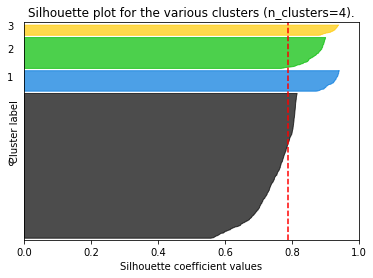

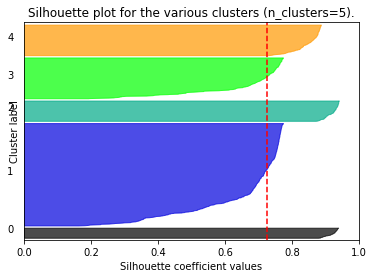

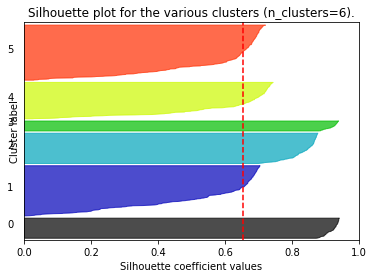

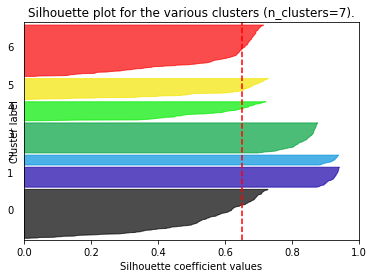

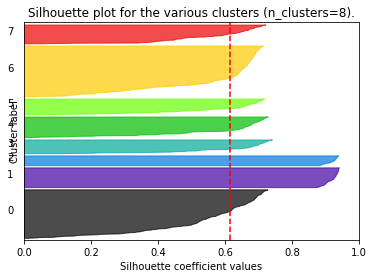

In [6]:
#use K-means clustering in order to filter through an array of clusters and determine the appropriate number of clusters for this data set
#use a silhouette plot in order to visualize this
clusters=[3,4,5,6,7,8]
for n_clusters in clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    
    # The 1st subplot is the silhouette plot
    ax1.set_xlim([0, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data) + (n_clusters + 1) * 10])
    
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data)
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is : %.4f"  % silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data, cluster_labels)

    y_lower = 10
    
    # Iterate over the clusters
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Silhouette plot for the various clusters (n_clusters=%i)." % (n_clusters))
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    

The ideal number of clusters is one in which all clusters have similar width and are equally close to the average silhouette score. In this case it is not quite clear, 3,4, or 5 clusters could be argued as relevant. Let's visualize each of the clusters in parameter space.

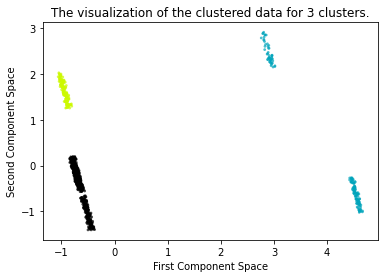

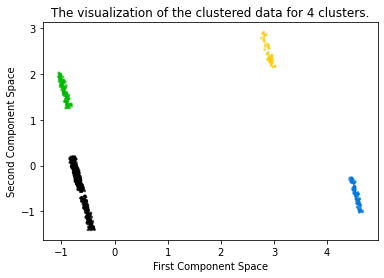

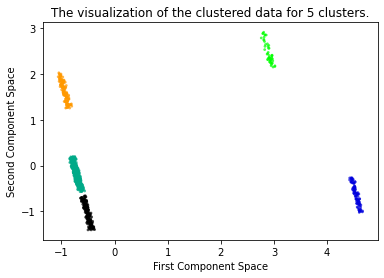

In [7]:
# start with the PCA
import sklearn.decomposition as skd
pca=skd.PCA(n_components=2)

range_n_clusters=[3,4,5]
for n_clusters in range_n_clusters:
    fig, axs=plt.subplots(1,1)
    clusterer=KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels=clusterer.fit_predict(data)
    
    #now apply the PCA before plotting
    X_pca=pca.fit_transform(data)
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    axs.scatter(X_pca[:, 0], X_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    axs.set_xlabel("First Component Space")
    axs.set_ylabel("Second Component Space")
    axs.set_title("The visualization of the clustered data for "+ str(n_clusters)+" clusters.")



It looks as though 5 clusters is the most appropriate after this visual spatial analysis.

In [1]:
#now lets use 5 K-means clusters in order to segment the data
data=pd.read_csv("RFM_data.csv")
clusterer=KMeans(n_clusters=5, random_state=10).fit(data)

#save and assign the k-means cluster labels to the original data set
cluster_labels=clusterer.labels_
data_labelled=data.assign(Cluster=cluster_labels)

#now group together the data set according to each cluster
print(data_labelled.groupby(['Cluster']).agg({'Recency':'mean',
                                             'Frequency':'mean',
                                             'MV':'mean',
                                             'CoS':'mean'}))

NameError: name 'pd' is not defined

For the first cluster (label 0), there is a very high monetary value, low frequency, and low recency, so I would name them "Big but Rare Spenders". These are the customers that the compnay would want to work to increase ther frequency and recency of interaction, but maintain the amount of money the customer spends per interaction. For the second cluster (label 1), there is a very low recency, but a high frequency and a low monetary value. These customers are visiting/interacting alot, are interacting very frequently, but are not spending very much money on each interaction. These customers should therefore be named "the Frequent Frugals" and employees/the company should try and push them harder to spend more per interaction. The third cluster (label 2) has a pretty average recency (close to the average Recency value as revealed in Task 1), but low frequency and high monetary value. These customers are similar to those in the first cluster, but with a lower frequency. I would name these customers the "Big but Rare-EST Spenders", and the company would want to push more interactions with these customers the most out of all the customer clusters. The fourth cluster (label 3) are high recency, high frequency, and low monetary value. Most likely these customers did not have postive expereinces with this company in the limited number of interactions they had (frequent customers in the beginning when they shopped/interacted here), and since their last visit have found another company at which to get their goods/services. I would therefore call these the "Lost Customers" and the company should try to reach out to them or try to find another way to find out how they are getting beaten by competition for this cluster of customers and try to improve to get them back. The last cluster (label 4), has a high recency, very low frequency, and high monetary value. These must be customers who made a very large single purchase with the company, and have since not returned. I would therfore name this cluster of customers the "One-Time Customers" because it seems it is unlikely that many of them had more than one interaction based on their frequency. I would suggest that the company try to make a better first impression on these customers, and then they would be able to keep their high monetary value customers.

In [11]:
#lets now explore the performance of an heirarchical clustering algorithm 
#again, using 5 clusters
clusterer=AgglomerativeClustering(n_clusters=5, affinity='cosine', linkage='complete')
cluster_labels=clusterer.fit_predict(data)
X_pca=pca.fit_transform(data)

fig, axs=subplots(1,1)
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
axs.scatter(X_pca[:, 0], X_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7,
            c=colors, edgecolor='k')
axs.set_xlabel("First Component Space")
axs.set_ylabel("Second Component Space")
axs.set_title("The visualization of the clustered data for 5 clusters")
plt.show()


NameError: name 'subplots' is not defined